In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_all = {
    'Pathway': [
        'Th17 cell\ndifferentiation',
        'Interleukin-2 family signaling',
        'unsaturated fatty acid\nbiosynthetic process',
        'lymphocyte activation',
    ],
    'Gene Ratio': [0.0759, 0.00506, 0.0380, 0.0886],
    'Count': [6, 4, 3, 7],
    'Q-value': [-2.06, -1.41, -0.35, -0.27]  # Log10(q)
}

# Convert to DataFrames
df_all = pd.DataFrame(data_all)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12960\1615739327.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar and legend


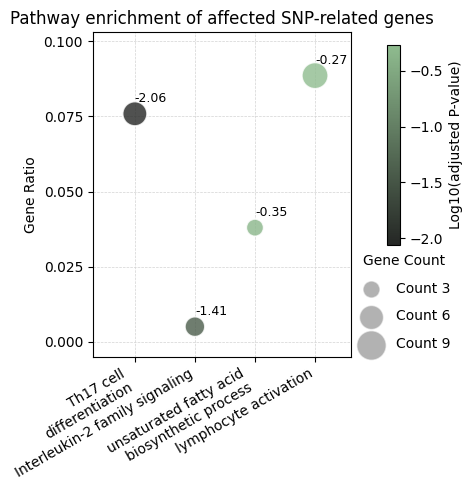

In [15]:
# Create a figure with two subplots
fig, ax = plt.subplots(figsize=(4.2, 5))

# Add light gray grid lines
ax.grid(True, which='both', axis='both', color='lightgray', linestyle='--', linewidth=0.5, zorder=1)

# Darker Morandi-style colormap
morandi_cmap = sns.dark_palette("#8FBC8F", as_cmap=True)

# Plot for 'all' (now transposed)
ax.scatter(df_all['Pathway'], df_all['Gene Ratio'],
                      s=df_all['Count']*50,  # Adjusting bubble size
                      c=df_all['Q-value'], cmap=morandi_cmap, alpha=0.8, edgecolors="w", label="all", zorder=3)
ax.set_title('Pathway enrichment of affected SNP-related genes')
ax.set_ylabel('Gene Ratio')

# Adding Q-value text labels next to each bubble
for i in range(len(df_all)):
    ax.text(df_all['Pathway'][i], df_all['Gene Ratio'][i] + 0.005,
                 f"{df_all['Q-value'][i]:.2f}", fontsize=9, color="black", ha="left", va="center")

# Reduce the number of y-axis ticks for a more compact view
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_ylim(-0.005,0.103)
ax.set_xlim(-0.7,3.6)

# Tilt the x-axis labels
plt.xticks(rotation=30, ha='right')

# Adjust spacing between x-axis labels for compactness
plt.subplots_adjust(hspace=0.3)

# Adding colorbar and placing it higher and shorter
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.5, 0.03, 0.4])  # Adjusted position: [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=morandi_cmap, norm=plt.Normalize(vmin=min(df_all['Q-value'].min(), df_all['Q-value'].min()),
                                                                     vmax=max(df_all['Q-value'].max(), df_all['Q-value'].max())))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Log10(adjusted P-value)')

# Adding a shared legend for bubble sizes and placing it higher
legend_ax = fig.add_axes([0.92, 0.33, 0.04, 0.11])  # Adjusted position: [left, bottom, width, height]
for size in [3, 6, 9]:
    legend_ax.scatter([], [], s=size*50, c="gray", label=f"Count {size}", alpha=0.6, edgecolors="w")
legend_ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Gene Count', loc='center')
legend_ax.axis('off')  # Hide axes for legend

# Adjust layout for a tighter fit
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar and legend
plt.savefig('GO-result.png',dpi=300, bbox_inches = 'tight')
plt.show()